<a href="https://colab.research.google.com/github/MathewBiddle/sandbox/blob/main/notebooks/IOOS_occurrences_in_OBIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
import gspread
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import sklearn as skl

## For google spreadsheet reading you need to authenticate w/ google
from google.colab import auth
auth.authenticate_user()


from google.auth import default
creds, _ = default()


In [2]:
# df_final = pd.DataFrame()

# matt_howard_url = 'https://docs.google.com/spreadsheets/d/15BSlB2ThK0P6r4QwevdkyiH9812NLqQNayOu0V44Lpc/edit#gid=0'

# gc = gspread.authorize(creds)
# worksheet = gc.open_by_url(matt_howard_url)
# responses = worksheet.worksheet('Sheet1')

# df = pd.DataFrame(responses.get_all_records())

# for dataset in df.loc[df['OBIS URL'] != '', 'OBIS URL']:
#   #print(dataset.split("/")[-1])
#   data = pd.DataFrame({'source': 'Matt Howard',
#                        'obis_datasetid': [dataset.split("/")[-1]]} )
#   df_final = pd.concat( [df_final, data] )

# df_final

In [3]:
df_final = pd.DataFrame()

mbon_reg_url = 'https://docs.google.com/spreadsheets/d/1jBS8ASS27yV8APZ8Fh-tgX6dHdopwianrUZv0kbKcxw/edit#gid=1284796732'

gc = gspread.authorize(creds)
worksheet = gc.open_by_url(mbon_reg_url)
responses = worksheet.worksheet('Form Responses 1')

df = pd.DataFrame(responses.get_all_records())

In [4]:
for dataset in df.loc[df['Has the dataset been submitted to OBIS?']=='Yes','If yes to above, please include appropriate OBIS link(s) here.']:
  print(dataset.split("/")[-1])
  data = pd.DataFrame({'source': 'MBON',
                       'obis_datasetid': [dataset.split("/")[-1]]} )
  df_final = pd.concat( [df_final, data] )
df_final

d32266b4-d98d-4eed-8207-57dff1f14cc4
ab06f0c6-3de3-447a-b339-a8517f2c95ed
cfceb150-bbe2-4efb-8682-14cfc7167e7c
afef5da2-614b-4208-aee6-c2413ed5ab76
62b97724-da17-4ca7-9b26-b2a22aeaab51
fbf4cb59-cef3-43be-b0ab-0dbab5f51740
5ef55cd8-05a1-4569-8e17-ceb224e40f59
cfceb150-bbe2-4efb-8682-14cfc7167e7c
c606c47a-3892-4645-9521-630c9085e59f
2d60dbdc-e801-4c66-991e-d484e8b08227
7eee0f1c-5afc-4135-94df-f3ecb169fa38
69a06619-6cb4-4c8a-8bb2-41f88c5669a1
f42a54d2-4283-47c9-a65b-49b34a34e3c2
6e930622-4421-41f8-b18b-f8d11dd51e15
a2e29f6c-4978-438f-8cc4-f6ea98b34141


,source,obis_datasetid
0,MBON,d32266b4-d98d-4eed-8207-57dff1f14cc4
0,MBON,ab06f0c6-3de3-447a-b339-a8517f2c95ed
0,MBON,cfceb150-bbe2-4efb-8682-14cfc7167e7c
0,MBON,afef5da2-614b-4208-aee6-c2413ed5ab76
0,MBON,62b97724-da17-4ca7-9b26-b2a22aeaab51
0,MBON,fbf4cb59-cef3-43be-b0ab-0dbab5f51740
0,MBON,5ef55cd8-05a1-4569-8e17-ceb224e40f59
0,MBON,cfceb150-bbe2-4efb-8682-14cfc7167e7c
0,MBON,c606c47a-3892-4645-9521-630c9085e59f
0,MBON,2d60dbdc-e801-4c66-991e-d484e8b08227


## Use pyobis

https://github.com/iobis/pyobis


In [5]:
try:
  import pyobis
except:
  !pip install pyobis

try:
  import geopandas
except:
  !pip install geopandas

try:
  import datashader
except:
  !pip install datashader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 50.0 MB/s 
     |████████████████████████████████| 6.3 MB 55.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 212 kB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=0e2d617405aed76851a9c0704c5e6dcdbc84f24c6433f826afac58a3678edc19
  Stored in directory: /root/.cache/pip/wheels/b5/b7/80/333a5c3312ed4cd54f5d5b869868c14e0c6002cb5c7238b52d
Successfully built datashape


In [6]:
# from pyobis.occurrences import OccQuery
# import geopandas as gpd

# cumulative_size = 0

# combined = pd.DataFrame()
# location_data = gpd.GeoDataFrame()

# for index, row in df_final.iterrows():

#   datasetid = row['obis_datasetid']

#   occ = OccQuery()
#   dataset = occ.search(datasetid = datasetid)

#   df = pd.DataFrame(dataset)
#   df['source'] = row['source']
#   #df[['decimalLongitude','decimalLatitude']] = pd.DataFrame(df['coordinates'].tolist())

#   combined = pd.concat([combined, df],ignore_index=True)

#   size = df.shape[0]

#   cumulative_size = cumulative_size + size

#   print("Found %i unique coordinates." % size)
#   print("See in mapper at: %s" % '{}{}#'.format('https://mapper.obis.org/?datasetid=',datasetid))

# print("\nFound %i total unique coordinates." % cumulative_size )

In [7]:
#row['source']

NameError: ignored

In [ ]:
#   # read into geopandas dataframe for plotting
# gdf = geopandas.GeoDataFrame(
#     combined, geometry=geopandas.points_from_xy(combined.decimalLongitude, combined.decimalLatitude))

# gdf['dataset_id'] = combined['datasetID']

# gdf['source'] = combined['source']

# location_data = pd.concat([location_data, gdf])

In [8]:
import geopandas as gpd
import urllib
import json

cumulative_size = 0

base = 'https://api.obis.org/v3/'

combined_data = gpd.GeoDataFrame()

location_data = gpd.GeoDataFrame() # initialize df

# build a list of the subset of fields you want back
fields = ['dataset_id','datasetID','id','decimalLatitude','decimalLongitude','species','aphiaID','date_year']
#fields = ['dataset_id','id']

f = "%2C".join([f"{v}" for v in fields])

#datasets = df.loc[df['Has the dataset been submitted to OBIS?']=='Yes','If yes to above, please include appropriate OBIS link(s) here.']

for index, row in df_final.iterrows():

  gpddf = gpd.GeoDataFrame()

  datasetid = row['obis_datasetid'] # grab the dataset uuid

  print("\nDataset ID:",datasetid)
  print("OBIS Dataset page: https://obis.org/dataset/{}".format(datasetid))

  url = 'https://api.obis.org/v3/occurrence?datasetid={}'.format(datasetid) # build the API url

  print("\tAPI request:", url)

  # find out how many occurrences we expect
  response = urllib.request.urlopen(url)
  data_json = json.loads(response.read())
  size = data_json['total']

  print("\tFound %i records." % size)

  cumulative_size = cumulative_size + size

  # grab the locations
  url = base + 'occurrence/points?datasetid={}'.format(datasetid)
  response = urllib.request.urlopen(url)
  gpddf = gpd.read_file(url)

  gpddf['dataset_id'] = datasetid
  gpddf['source'] = row['source']

  location_data = pd.concat([location_data, gpddf])

print('Final shape:',location_data.shape)


Dataset ID: d32266b4-d98d-4eed-8207-57dff1f14cc4
OBIS Dataset page: https://obis.org/dataset/d32266b4-d98d-4eed-8207-57dff1f14cc4
	API request: https://api.obis.org/v3/occurrence?datasetid=d32266b4-d98d-4eed-8207-57dff1f14cc4
	Found 4511 records.

Dataset ID: ab06f0c6-3de3-447a-b339-a8517f2c95ed
OBIS Dataset page: https://obis.org/dataset/ab06f0c6-3de3-447a-b339-a8517f2c95ed
	API request: https://api.obis.org/v3/occurrence?datasetid=ab06f0c6-3de3-447a-b339-a8517f2c95ed
	Found 4840 records.

Dataset ID: cfceb150-bbe2-4efb-8682-14cfc7167e7c
OBIS Dataset page: https://obis.org/dataset/cfceb150-bbe2-4efb-8682-14cfc7167e7c
	API request: https://api.obis.org/v3/occurrence?datasetid=cfceb150-bbe2-4efb-8682-14cfc7167e7c
	Found 237709 records.

Dataset ID: afef5da2-614b-4208-aee6-c2413ed5ab76
OBIS Dataset page: https://obis.org/dataset/afef5da2-614b-4208-aee6-c2413ed5ab76
	API request: https://api.obis.org/v3/occurrence?datasetid=afef5da2-614b-4208-aee6-c2413ed5ab76
	Found 1320 records.

Datas

In [ ]:
location_data

In [9]:
import datashader as ds
import colorcet

cvs = ds.Canvas(plot_width=1000, plot_height=700)
agg = cvs.points(location_data, 'decimalLongitude', 'decimalLatitude')
img = ds.tf.set_background(ds.tf.shade(agg, cmap=colorcet.fire, how='log'), "white")

img

KeyError: ignored

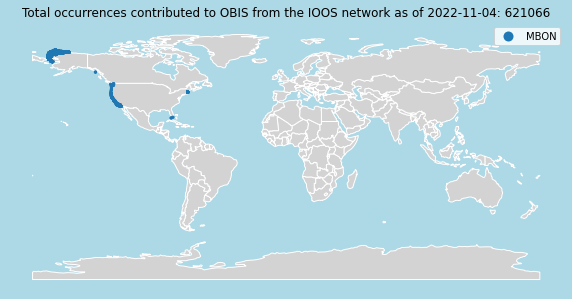

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(figsize=(10,5), facecolor='lightblue')

location_data = location_data.to_crs("epsg:4326")
location_data.plot(ax=ax, markersize=5, column='source', zorder=10, legend=True)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.to_crs(location_data.crs)

world.plot(ax=ax, color='lightgrey', edgecolor='white', zorder=1)

now = datetime.now()

today = now.strftime("%Y-%m-%d")

plt.title("Total occurrences contributed to OBIS from the IOOS network as of %s: %i" % (today, cumulative_size ))

ax.set_axis_off();

plt.show()

In [11]:
!pip install matplotlib mapclassify
!pip install folium -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.12.1.post1
    Uninstalling folium-0.12.1.post1:
      Successfully uninstalled folium-0.12.1.post1


In [12]:
location_data.explore(column='source', tooltip=True, tiles='CartoDB dark_matter')

In [ ]:
location_data.to_file("ioos_occurrences_obis.geojson", driver='GeoJSON')